In [2]:
import json, os

kaggle_json = {
    "username": "YOUR_KAGGLE_USERNAME",
    "key": "KGAT_881f59af7d1d9c6524d04e53c32c1f0d"
}

os.makedirs("/root/.kaggle", exist_ok=True)

with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_json, f)

os.chmod("/root/.kaggle/kaggle.json", 0o600)


In [3]:
!kaggle datasets list | head


ref                                                                 title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
saidaminsaidaxmadov/chocolate-sales                                 Chocolate Sales                                         468320  2026-01-04 14:23:35.490000          20128        375  1.0              
aliiihussain/amazon-sales-dataset                                   Amazon_Sales_Dataset                                   1297759  2026-02-01 11:37:12.353000           5126         91  1.0              
amar5693/student-performance-dataset                                Student Performance Dataset                             177286  2026-02-12 06:04:44.613000           1200         24

In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'face-mask-dataset' dataset.
Path to dataset files: /kaggle/input/face-mask-dataset


In [19]:
!kaggle datasets download -d omkargurav/face-mask-dataset


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
#!unzip face-mask-dataset.zip -d data


In [21]:
#Importing the dependencies



In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [23]:
with_mask_files= os.listdir('/content/data/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2632.jpg', 'with_mask_8.jpg', 'with_mask_3495.jpg', 'with_mask_121.jpg', 'with_mask_977.jpg']
['with_mask_719.jpg', 'with_mask_3242.jpg', 'with_mask_1540.jpg', 'with_mask_1223.jpg', 'with_mask_3333.jpg']


In [24]:
without_mask_files= os.listdir('/content/data/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_593.jpg', 'without_mask_2905.jpg', 'without_mask_2356.jpg', 'without_mask_1478.jpg', 'without_mask_1379.jpg']
['without_mask_1751.jpg', 'without_mask_564.jpg', 'without_mask_2117.jpg', 'without_mask_1132.jpg', 'without_mask_1378.jpg']


In [25]:
print('Number of Mask images :',len(with_mask_files))
print('Number of without Mask Images: ',len(without_mask_files))

Number of Mask images : 3725
Number of without Mask Images:  3828


Creating Labels

with mask->1
without mask->0

In [26]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [27]:
 print(with_mask_labels[0:5])
 print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [28]:
print(len(with_mask_labels))

3725


In [29]:
print(len(without_mask_labels))

3828


In [30]:
labels=with_mask_labels+without_mask_labels

Displaying The images

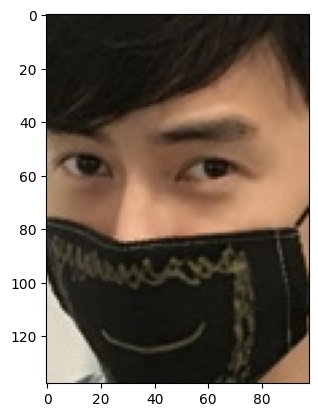

In [31]:
#displaying the image
img=mpimg.imread('/content/data/data/with_mask/with_mask_8.jpg')
imgplot=plt.imshow(img)
plt.show()

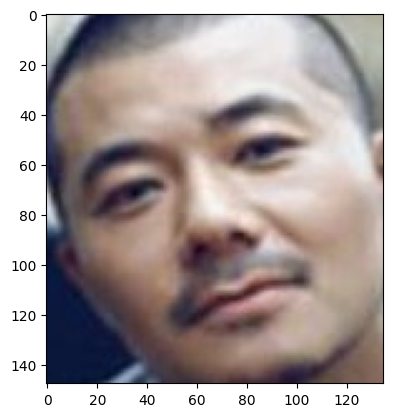

In [32]:
#displaying the image
img=mpimg.imread('/content/data/data/without_mask/without_mask_8.jpg')
imgplot=plt.imshow(img)
plt.show()

Image Processing 1.resize the image 2.convert image to numpy arrays

In [33]:
with_mask_path='/content/data/data/with_mask/'

data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1034: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [34]:
without_mask_path='/content/data/data/without_mask/'


for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [35]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
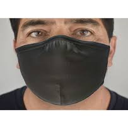

In [36]:
data[0]

In [37]:
data[0].shape

(128, 128, 3)

Converting images list and label list to numpy arrays

In [38]:
X=np.array(data)
y=np.array(labels)

In [39]:
print(X.shape)

(7553, 128, 128, 3)


In [40]:
print(y.shape)

(7553,)


In [41]:
print(y)

[1 1 1 ... 0 0 0]


Train Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [43]:
len(data)

7553

In [44]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [45]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow(
    X_train_scaled,
    y_train,
    batch_size=32
)


In [46]:
import tensorflow as tf
from tensorflow import  keras

In [47]:
# num_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.add(keras.layers.Flatten())

In [49]:
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

In [50]:
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

In [51]:
model.add(keras.layers.Dense(1,activation='sigmoid'))

Complie the neural networks

In [52]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Training the neural networks

In [53]:
# history=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=15)
history = model.fit(
    train_generator,
    validation_data=(X_test_scaled, y_test),
    epochs=20
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 75s 390ms/step - accuracy: 0.6966 - loss: 0.5666 - val_accuracy: 0.8795 - val_loss: 0.2866
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 73s 386ms/step - accuracy: 0.8396 - loss: 0.4149 - val_accuracy: 0.9073 - val_loss: 0.2427
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 72s 381ms/step - accuracy: 0.8572 - loss: 0.3494 - val_accuracy: 0.9219 - val_loss: 0.2031
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 72s 381ms/step - accuracy: 0.8812 - loss: 0.3123 - val_accuracy: 0.9371 - val_loss: 0.1831
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 72s 382ms/step - accuracy: 0.8933 - loss: 0.2950 - val_accuracy: 0.9298 - val_loss: 0.1941
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 72s 380ms/step - accuracy: 0.8970 - loss: 0.2800 - val_accuracy: 0.9365 - val_loss: 0.1627
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 72s 379ms/step - accuracy: 0.8989 - loss: 0.2673 - val_accuracy: 0.9398 - val_loss: 0.1656
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 72s 379ms/step - accuracy: 0.9117 - loss: 0

In [54]:
loss,accuracy=model.evaluate(X_test_scaled,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9559 - loss: 0.1450


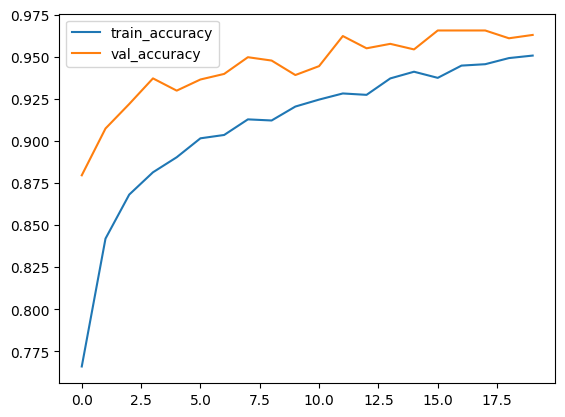

In [55]:
 h=history
 plt.plot(h.history['accuracy'], label='train_accuracy')
plt.plot(h.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


In [56]:
# plt.plot(h.history['acc'],label='train_loss')
# plt.plot(h.history['val_acc'],label='validation loss')
# plt.legend()
# plt.show()

Path of the image to be predicted/content/data/data/with_mask/with_mask_1.jpg


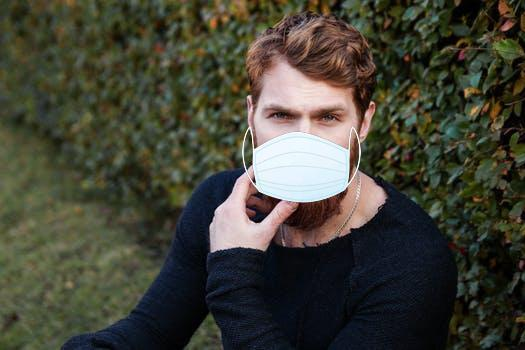

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.93291086]]
The person is wearing a mask


In [76]:
input_image_path=input('Path of the image to be predicted')

input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255

input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_pred=model.predict(input_image_reshaped)



print(input_pred)

if input_pred[0][0] > 0.5:
    print('The person is wearing a mask')
else:
    print('The person is not wearing a mask')



In [77]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9559 - loss: 0.1450
Test Accuracy: 0.9629384279251099


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)


print(history.history.keys())
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


In [ ]:
model.save("face_mask_model.h5")
